<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 1 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.00</h2>
</center>

# Librerías (no utilizar liberías adicionales)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto


La pérdida de significancia ocurre cuando los cálculos aritméticos introducen errores debido a la limitación en la representación de números en una computadora. Esto puede suceder cuando se operan números con magnitudes muy diferentes o cuando se realizan operaciones que implican restas de números cercanos en valor. Los sistemas informáticos, incluidos los sistemas de punto flotante utilizados para representar números en la mayoría de las computadoras, tienen una cantidad finita de bits para representar números, lo que lleva a que algunos valores no puedan ser representados exactamente, y puede llevar a resultados inesperados o incorrectos en cálculos numéricos. 

Un ejemplo es la siguiente función:

$$
f_1(x) = \dfrac{1 - \cos x}{\sin^2x}
$$

La cual exhibe una pérdida de importancia cuando $x \rightarrow 0^+$.

Al aplicar identidades trigonométricas, podemos obtener una representación alternativa de la función:

$$
f_2(x) = \dfrac{1}{1+\cos x}
$$

La cual no exhibe pérdida de importancia cuando $x \rightarrow 0^+$.

Este fenómeno lo podemos observar en el siguiente gráfico:

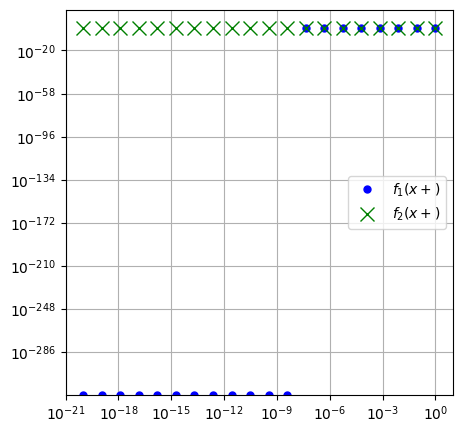

In [ ]:
f1 = lambda x: (1 - np.cos(x))/np.power(np.sin(x),2.)
f2 = lambda x: 1. / (1. + np.cos(x))

plt.figure(figsize=(5,5))
x = np.logspace(-20,0,20)
y1 = np.abs(f1(x))+np.power(2.,-1074)
y2 = np.abs(f2(x))+np.power(2.,-1074)
plt.loglog(x,y1,'b.', label='$f_1(x+)$', markersize=10)
plt.loglog(x,y2,'gx', label='$f_2(x+)$', markersize=10)
plt.grid(True)
plt.legend(loc='center right')
plt.show()

Podemos observar claramente que existe una pérdida de importancia para $f_1(x)$ pero no para $f_2(x)$.

Para esta tarea trabajaremos con la siguiente función:

$$
f(x) = \dfrac{1 - x}{1 + x} - \dfrac{1}{3x + 1}
$$

## Funciones Entregadas
*No debe modificarlas*

In [ ]:
def bisect(f, a, b, tol=1e-100):
  '''
  input:
  f   : (callable) function to evaluate.
  a   : (double)   left value of interval.
  b   : (double)   right value of interval.
  tol : (double)   tolerance.

  output:
  xc  : (double)   root approximation of f. 
  '''
  fa = f(a)
  fb = f(b)
  i = 0
  if np.sign(fa*fb) > 0:
    print("f(a)f(b) < 0 not satisfied!")
    return None
  
  while((b-a)/2 > tol):
    c = (a+b)/2
    fc = f(c)

    if fc == 0:
      break
    elif np.sign(fa*fc) < 0:
      b = c
      fb = fc
    else:
      a = c
      fa = fc
    i += 1
  xc = (a + b)/2
  return xc

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en dos bloques. El primer bloque será desde las 08:00 hrs hasta las 10:00 hrs, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 10:01 hrs. El segundo bloque de consultas será desde las 10:01 hrs hasta las 14:00 hrs, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:01 hrs.

# Desarrollo

## Pregunta 1 (20 puntos)

Ejecute el método de la bisección en el intervalo $[-0.1,0.2]$ para la búsqueda de una raíz de $f(x)$ 

¿Es el valor $\verb|r|$ obtenido realmente una raíz de $f(x)$? Si no es así ¿Qué se puede hacer para corregir este problema?

In [ ]:
#acá va su codigo
#--------------------------------
f = lambda x: (1. - x)/(1. + x) - 1./(3.*x + 1.)
r = bisect(f,-0.1,0.2)
#--------------------------------
r

1.7763568394002506e-16

Agregue en este markdown sus respuestas.

El resultado de r es aproximadamente 1.7763568394002506e-16, el cual al evaluarlo en f se obtiene 0.0 lo que claramente no es correcto, ya que la raíz exacta es r = 0 y al evaluar f(0) sí el resultado es 0. Por lo tanto, al obtener el valor de r que entrega bisección y al evaluar esta raíz en la función f existe una pérdida de importancia, ya que f(r) = 0.0 para el r obtenido.

Para corregir este problema se debe construir una función f equivalente que no tenga pérdida de importancia.

## Pregunta 2 (40 puntos)
En el siguiente gráfico podemos observar el comportamiento de $f(x)$ cuando $x \rightarrow 0^+$

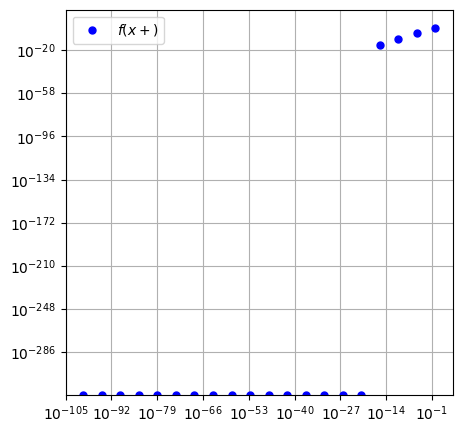

In [ ]:
plt.figure(figsize=(5,5))
x = np.logspace(-100,0,20)
y = np.abs(f(x))+np.power(2.,-1074)
plt.loglog(x,y,'b.', label='$f(x+)$', markersize=10)
plt.grid(True)
plt.legend(loc='best')
plt.show()

Proponga un algoritmo que determine el máximo valor de $\verb|x|$ en _double precision_ tal que para $0 < x < 10^{-1}$ la función $\verb|f(x)|$ entrega un valor igual a $\verb|0.0|$.

In [ ]:
def max_x(f):
    '''
    input:
    f  : (callable) function to evaluate.

    output:
    xm : (double) maximum value to find.
    '''
    #acá va su codigo
    #--------------------------------
    a,b = 0.,1e-1
    fa = f(a)
    fb = f(b)
    i = 0
    tol = 1e-100
    maxNumberIterations = 100
    while ((b-a)/2 > tol) and i <= maxNumberIterations:
        c = (a+b)/2
        fc = f(c)
        if fc > 0: #Bisection modification
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
    xm = (a + b)/2
    #--------------------------------
    return xm

max_x(f)

1.8503717077085943e-16

## Pregunta 3 (30 puntos)

Proponga una representación alternativa $\tilde{f}(x)$ de la función $f(x)$ tal que el método de la bisección entregue una aproximación significativamente mejor de la raíz real de menor magnitud.

Entregue el desarrollo de $\tilde{f}(x)$ en markdown.

Escriba acá el desarrollo de $\tilde{f}(x)$

Solución:

$f(x) = \dfrac{1 - x}{1 + x} - \dfrac{1}{3x + 1} = \dfrac{(3x + 1)(1 - x) - (1 + x)}{(1 + x)(3x + 1)} = \dfrac{3x - 3x^2 + 1 - x - 1 - x}{3x + 1 + 3x^2 + x} = \dfrac{x - 3x^2}{3x^2 + 4x + 1} = \tilde{f}(x)$

Luego,

$\tilde{f}(x) = \dfrac{x - 3x^2}{3x^2 + 4x + 1}$

In [ ]:
#acá va su codigo
#--------------------------------
f_tilde = lambda x: (x-3.*x**2)/(3.*x**2+4*x+1)
r = bisect(f,-0.1,0.2)
r_tilde = bisect(f_tilde,-0.1,0.2)
#--------------------------------

r, r_tilde

(1.7763568394002506e-16, 2.28597478256455e-101)

**¡Ha llegado al final de la tarea! No olvide enviarla antes de las 18:00 hrs. Mucho éxito!**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5fa720e3-deed-4446-8cab-e9c1f7702000' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>